# <center> Validus Risk Management - Case Study <center>

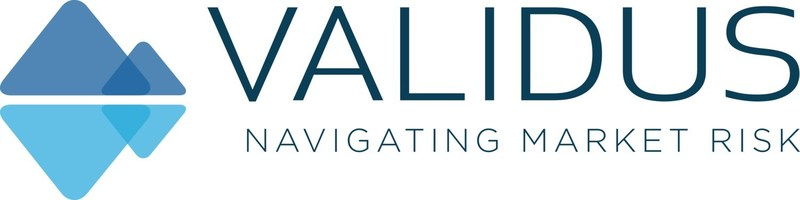

In [1]:
from IPython.display import Image
Image(filename='Validus_logo.jpg',  width=700)

## Introducing the Problem

Validus Fund V is a Private Equity Fund (USD Fund) investing in a GBP asset, and it is thus exposed to Foreign Exchange risk.

Validus asks me to evaluate the impact of the GBPUSD spot rate over future cashflows.

I will first run a Monte Carlo simulation predicting 1000 paths of the GBPUSD spot rate evolution over the next 5 years.

Using Cash Flow data, I will evaluate the expected future USD cashflows as well as the worst case scenarios.

KPIs such as the IRR will help me further analyse the situation as well as evaluate a possible hedging strategy that Validus is taking into consideration.

## Question a)

In this part of the study, I will simulate 1000 paths for the GBPUSD spot rate over the next five years.

The assumption made to estimate the spot rate is that the GBPUSD spot rate follows a Geometric Brownian Motion (GBM) model.

A GBM is a stochastic process {$S_{t}$} satisfying the following Stochastic Differential Equation (SDE):
<h3><center>$dS_{t} = \mu S_{t} dt + \sigma S_{t} dW_{t}$</center><h3>

Using Ito's lemma, we could show that the unique solution to this SDE is :
<h3><center>$S_{t} = S_{0}\exp((\mu - \frac{\sigma^{2}}{2})t + \sigma W_{t}) $</center><h3>

Or, for T and t such as $0\leq t<t+dt\leq T$ :
<h3><center>$S_{t+dt} = S_{t}\exp((\mu - \frac{\sigma^{2}}{2})(dt) + \sigma (W_{t+dt}-W_{t})$</center><h3>

Reminding here that {$W_{t}$} is a Brownian Motion, meaning that ($W_{t+dt}-W_{t}$) follows the Normal distribution $N(0,d_{t})$.

Here are the assumptions made to solve this question :
* There is no drift meaning there is not any deterministic component : $\mu = 0$.

* Spot rate on $31^{st}$ March 2021 is 1.3925 : $S_{0} = 1.3925$.

* $T=5$, $dt=1$ as we predict for each year over the next 5 years.

<h7>I will use the latest formula to simulate the value of the GBPUSD spot rate for each one of the next 5 years.\
(On $31^{st}$ of March of each year, matching with cashflows schedule).<h7>

### Code

In [2]:
#Importing all the needed libraries
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(15)
import random
import seaborn as sns
import pandas as pd
import datetime
import os

if os.getcwd() != '/Users/rossi/Desktop/Validus - Case Study': #You may have to adapt this path to run it properly
    os.chdir('/Users/rossi/Desktop/Validus - Case Study')

In [3]:
#Time parameters
dt=1
T = 5

#Creating a dataframe with all targeted date as index
start_date = datetime.date(2021, 3, 31)
df_predictions = pd.DataFrame(index = pd.date_range(start_date, periods = T+1, freq = 'A-MAR'))

#Standard Deviation
sigma = np.sqrt(0.1)

#Number of simulations
N_simu = 1000

#Initial spot rate 
spot=1.3925

In [4]:
#Monte Carlo simulation
time_range = np.arange(2021,2021+T+dt, dt)
GBP_USD_2021 = 1.3925
matrix = np.zeros([N_simu,len(time_range)])
matrix[:,0]=GBP_USD_2021
for t in range(len(time_range)-1):
    matrix[:,t+1]=matrix[:,t]*np.exp((-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.standard_normal(N_simu))

In [5]:
#Importing the simulations in the dataframe
for i in range(N_simu):
    df_predictions['Prediction #' + str(i+1)] = matrix[i,:]

<h4>Here is the dataframe of our predictions :<h4>

In [6]:
df_predictions

,Prediction #1,Prediction #2,Prediction #3,Prediction #4,Prediction #5,Prediction #6,Prediction #7,Prediction #8,Prediction #9,Prediction #10,...,Prediction #991,Prediction #992,Prediction #993,Prediction #994,Prediction #995,Prediction #996,Prediction #997,Prediction #998,Prediction #999,Prediction #1000
2021-03-31,1.392500,1.392500,1.392500,1.392500,1.392500,1.392500,1.392500,1.392500,1.392500,1.392500,...,1.392500,1.392500,1.392500,1.392500,1.392500,1.392500,1.392500,1.392500,1.392500,1.392500
2022-03-31,1.200015,1.474608,1.260865,1.130230,1.427028,0.758358,0.936654,0.939055,1.202734,1.140296,...,2.178697,0.977177,1.037617,1.575247,1.202789,1.261275,0.899544,0.928260,1.905850,1.753922
2023-03-31,1.632000,1.020765,1.081702,1.273289,1.328344,0.560974,0.934143,1.017625,1.085195,1.583773,...,1.972099,0.772611,0.671482,1.761704,1.281381,2.029172,0.877830,0.686559,1.870004,2.621203
2024-03-31,1.408050,1.149307,1.103086,0.755534,1.788896,0.871240,0.836249,1.981137,0.808240,1.762958,...,1.241448,0.540975,0.622004,1.194107,1.963546,3.170921,1.700482,0.396128,1.131944,2.775349
2025-03-31,0.938295,1.048769,1.060382,0.847407,1.860482,0.871278,0.807223,1.251913,1.234017,1.262068,...,1.094038,0.565701,0.807386,0.767441,1.988349,3.024674,0.783979,0.441917,1.288876,2.124140
2026-03-31,0.799317,0.688292,1.191143,0.918396,0.947959,0.868854,0.857576,1.012106,0.955967,1.048359,...,0.931572,0.675212,0.529178,0.853369,2.294146,3.929358,0.483160,0.443383,2.175513,1.737962


<h4>Plotting 10 path simulations chosen randomly.<h4>

<Figure size 720x504 with 0 Axes>

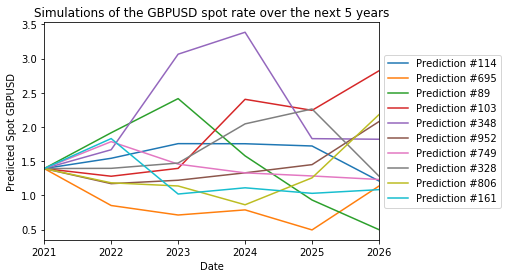

In [7]:
plt.figure(figsize = (10,7))
df_predictions.iloc[:,random.sample(range(0, N_simu-1), 10)].plot()
plt.title('Simulations of the GBPUSD spot rate over the next 5 years', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Date')
plt.ylabel('Predicted Spot GBPUSD')
plt.show()

<h4>Here is the mean of our predictions for the GBPUSD spot rate on $31^{st}$ March 2026.<h4>

In [8]:
df_predictions.tail(1).mean().mean()

1.4000037342033607

<h4>Here is the distribution of our predictions for the GBPUSD spot rate on $31^{st}$ March 2026.<h4>

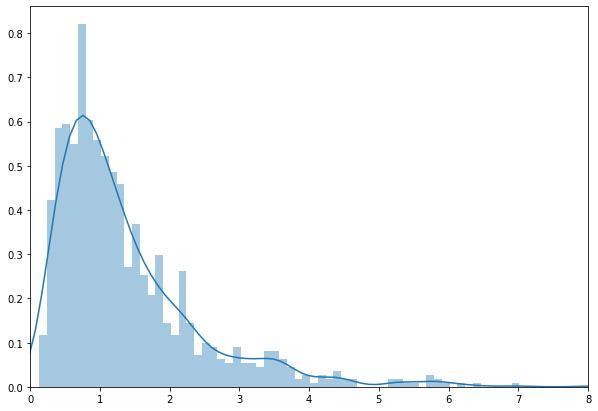

In [9]:
plt.figure(figsize = (10,7))
sns.distplot(df_predictions.tail(1),bins = 100)
plt.xlim(0, 8)
plt.show()

## Question b)

In this part of the case study, I will use the simulated GBPUSD Spot rates to convert for each prediction, the corresponding path of predicted USD cashflow.

<h4>First, let's import the data we care about from the Excel file.<h4>

In [10]:
#Importing data from the Excel file
df_cashflows_predictions = \
    pd.read_excel("Quantitative Analyst Case Study 2021 - Cashflow Model.xlsx", index_col=0, \
                  usecols=['Date', 'Cashflow Amount (in Local Asset Currecny)', \
                           'Local Asset Currency', 'Fund Currency'])
df_cashflows_predictions.columns = ['Cashflow Amount (mGBP)',
       'Local Asset Currency', 'Fund Currency']

#Converting cashflow amounts in million
df_cashflows_predictions['Cashflow Amount (mGBP)']=df_cashflows_predictions['Cashflow Amount (mGBP)']/1000000

<h4>Now, let's convert the GBP cashflows in USD for each one of the 1000 predictions.<h4>

In [11]:
for i in range(N_simu):
    df_cashflows_predictions['Cashflow Amount Prediction (mUSD) #' + str(i+1)] \
    = df_predictions['Prediction #' + str(i+1)]\
    *df_cashflows_predictions['Cashflow Amount (mGBP)']

<h4>Here is the dataframe of all predicted sets of cashflows over the next 5 years.<h4>

In [12]:
df_cashflows_predictions

,Cashflow Amount (mGBP),Local Asset Currency,Fund Currency,Cashflow Amount Prediction (mUSD) #1,Cashflow Amount Prediction (mUSD) #2,Cashflow Amount Prediction (mUSD) #3,Cashflow Amount Prediction (mUSD) #4,Cashflow Amount Prediction (mUSD) #5,Cashflow Amount Prediction (mUSD) #6,Cashflow Amount Prediction (mUSD) #7,...,Cashflow Amount Prediction (mUSD) #991,Cashflow Amount Prediction (mUSD) #992,Cashflow Amount Prediction (mUSD) #993,Cashflow Amount Prediction (mUSD) #994,Cashflow Amount Prediction (mUSD) #995,Cashflow Amount Prediction (mUSD) #996,Cashflow Amount Prediction (mUSD) #997,Cashflow Amount Prediction (mUSD) #998,Cashflow Amount Prediction (mUSD) #999,Cashflow Amount Prediction (mUSD) #1000
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,-100.0,GBP,USD,-139.250000,-139.250000,-139.250000,-139.250000,-139.250000,-139.250000,-139.250000,...,-139.250000,-139.250000,-139.250000,-139.250000,-139.250000,-139.250000,-139.250000,-139.250000,-139.250000,-139.250000
2022-03-31,15.0,GBP,USD,18.000220,22.119114,18.912977,16.953445,21.405423,11.375364,14.049810,...,32.680462,14.657661,15.564258,23.628710,18.041838,18.919129,13.493157,13.923900,28.587748,26.308836
2023-03-31,15.0,GBP,USD,24.480000,15.311468,16.225526,19.099328,19.925153,8.414604,14.012144,...,29.581489,11.589164,10.072228,26.425567,19.220722,30.437582,13.167445,10.298388,28.050059,39.318048
2024-03-31,15.0,GBP,USD,21.120749,17.239598,16.546283,11.333004,26.833441,13.068606,12.543737,...,18.621724,8.114631,9.330058,17.911603,29.453186,47.563817,25.507231,5.941916,16.979162,41.630234
2025-03-31,15.0,GBP,USD,14.074418,15.731539,15.905729,12.711108,27.907233,13.069171,12.108349,...,16.410565,8.485510,12.110797,11.511616,29.825234,45.370113,11.759685,6.628749,19.333139,31.862093
2026-03-31,115.0,GBP,USD,91.921467,79.153529,136.981434,105.615578,109.015336,99.918250,98.621251,...,107.130729,77.649336,60.855509,98.137475,263.826763,451.876158,55.563421,50.989011,250.184003,199.865617


Now computing IRRs for each path of predicted Cashflows.

In [13]:
predicted_irr = []
for i in range(N_simu):
    predicted_irr.append(100*\
            round(np.irr(np.array(df_cashflows_predictions['Cashflow Amount Prediction (mUSD) #'+str(i+1)])),4))

/Users/rossi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  after removing the cwd from sys.path.


<h4>Here is the distribution of the computed IRR following the Monte Carlo simulation.<h4>

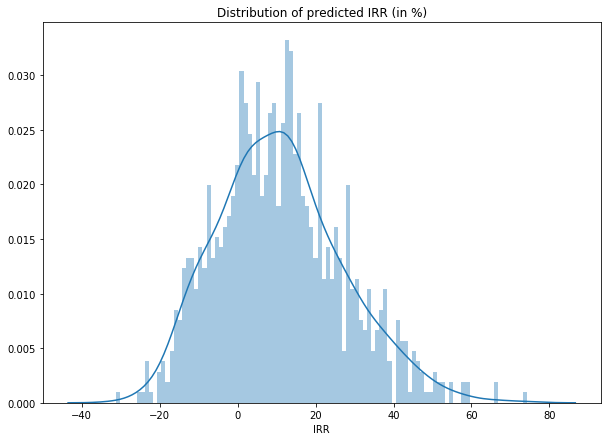

In [14]:
plt.figure(figsize = (10,7))
sns.distplot(predicted_irr,bins = 100)
plt.title('Distribution of predicted IRR (in %)', color='black')
plt.xlabel('IRR')
plt.show()

<h4>IRR percentiles<h4>

In [15]:
print('The 5th percentile of the predicted IRRs is ' + str(round(np.percentile(predicted_irr,5),2)) + '%.')
print('The 50th percentile of the predicted IRRs is ' + str(round(np.percentile(predicted_irr,50),2)) + '%.')
print('The 95th percentile of the predicted IRRs is ' + str(round(np.percentile(predicted_irr,95),2)) + '%.')

The 5th percentile of the predicted IRRs is -13.36%.
The 50th percentile of the predicted IRRs is 9.94%.
The 95th percentile of the predicted IRRs is 40.69%.


## Question c)

In this part of the study, Validus Risk Management is considering a hedge buying a Put option with following details :
* Trade Date : 31/03/2021
* Expiry Date : 31/03/2026
* Notional Amount : £100,000,000.00
* Strike : $K = 1.3925$

One important assumption we are making is that USD and GBP risk-free rates ($r_{USD}$ and $r_{GBP}$) are taken equal to 0%.

Indeed, under the Interest Rate Parity, we have the following relation :

<center><h4>$S_{GBPUSD}(1+r_{USD})^{T} = (1+r_{GBP})^{T}F_{T, GBPUSD}$<h4><center> 
    
This means that under the assumptions made earlier $r_{USD}=0\%$ and $r_{GBP}=0\%$, we have, for any period T :
    
<center><h4>$S_{GBPUSD} = F_{T, GBPUSD}$<h4><center>
    
Which corresponds to the assumption made for the MonteCarlo simulation as having no drift means we expected the 1-year change in GBP USD to be equal to 0.


### Computation of the expected option premium using the simulations

To empirically give a fair value for the Put Option price, I decided to compute the payoff of the considered option for each one of the predictions made earlier : 

<center>$ \textit{USD Payoff}_{i}= (K-\hat{S}_{i})^{+} \times \textit{Notional}$<center>

And then my option premium fair market value $P$ would be :
<center>$P_{USD} = \frac{1}{N}\sum_{i=1}^{N}{USD Payoff}_{i}$<center>
    
And :
<center>$P_{GBP}= F_{T, GBPUSD}*P_{USD} = S_{GBPUSD}*P_{USD} = 1.3925*P_{USD}$ 

### Code

In [16]:
#Strike
K = 1.3925

#Notional
notional = 100.0 #in M GBP

#Computing the payoff table
payoff_table = []
for i in range(N_simu):
    payoff_table.append(max(K-df_predictions['Prediction #' + str(i+1)].iloc[-1],0))

Here would be the premium in mUSD : 

In [17]:
USD_premium = round(np.mean(payoff_table)*100,2)
USD_premium

39.12

Here would be the  premium in mGBP :

In [18]:
GBP_premium = round(np.mean(payoff_table)*100/1.3925,2)
GBP_premium

28.09

## Question d)

In this question, I will compute the distribution of the IRR of the hedged portfolio.

The main change with the cashflow predictions in question b) is that we are going to add two flows for each simulation : 

* As of 31/03/2021, the paid option premium computed in the precedent question for each set of predicted cashflows. This corresponds to a negative cashflow of USD 39.12m
* As of 31/03/2026, i will add the payoff of the put option discussed above, which will be different for each set of predictions

### Code

In [19]:
#Copying the dataframe from Question b) on which we will add two cashflows
df_cashflows_payoff = df_cashflows_predictions.copy()

In [20]:
#Adding GBP premium to the cashflow amount in GBP on 31/03/2021
df_cashflows_payoff.iloc[0,0]=df_cashflows_payoff.iloc[0,0]-GBP_premium

#Adding GBP premium to the cashflow amount in GBP on 31/03/2021
df_cashflows_payoff.iloc[-1,0]=df_cashflows_payoff.iloc[-1,0]+GBP_premium

#Adding USD premium to the cashflow amount in USD on 31/03/2021 for each prediction
df_cashflows_payoff.iloc[0,3:]=df_cashflows_payoff.iloc[0,3:]-USD_premium

#Adding USD payoff to the the cashflow amounts in USD on 31/03/2026
df_cashflows_payoff.iloc[-1,3:] = np.array((K-df_predictions.iloc[-1,:]>0)*(K-df_predictions.iloc[-1,:])*100)+df_cashflows_payoff.iloc[-1,3:]

<h4>Here is the dataframe of all predicted sets of cashflows over the next 5 years.<h4>

In [21]:
df_cashflows_payoff

,Cashflow Amount (mGBP),Local Asset Currency,Fund Currency,Cashflow Amount Prediction (mUSD) #1,Cashflow Amount Prediction (mUSD) #2,Cashflow Amount Prediction (mUSD) #3,Cashflow Amount Prediction (mUSD) #4,Cashflow Amount Prediction (mUSD) #5,Cashflow Amount Prediction (mUSD) #6,Cashflow Amount Prediction (mUSD) #7,...,Cashflow Amount Prediction (mUSD) #991,Cashflow Amount Prediction (mUSD) #992,Cashflow Amount Prediction (mUSD) #993,Cashflow Amount Prediction (mUSD) #994,Cashflow Amount Prediction (mUSD) #995,Cashflow Amount Prediction (mUSD) #996,Cashflow Amount Prediction (mUSD) #997,Cashflow Amount Prediction (mUSD) #998,Cashflow Amount Prediction (mUSD) #999,Cashflow Amount Prediction (mUSD) #1000
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,-128.09,GBP,USD,-178.370000,-178.370000,-178.370000,-178.370000,-178.370000,-178.370000,-178.370000,...,-178.370000,-178.370000,-178.370000,-178.370000,-178.370000,-178.370000,-178.370000,-178.370000,-178.370000,-178.370000
2022-03-31,15.00,GBP,USD,18.000220,22.119114,18.912977,16.953445,21.405423,11.375364,14.049810,...,32.680462,14.657661,15.564258,23.628710,18.041838,18.919129,13.493157,13.923900,28.587748,26.308836
2023-03-31,15.00,GBP,USD,24.480000,15.311468,16.225526,19.099328,19.925153,8.414604,14.012144,...,29.581489,11.589164,10.072228,26.425567,19.220722,30.437582,13.167445,10.298388,28.050059,39.318048
2024-03-31,15.00,GBP,USD,21.120749,17.239598,16.546283,11.333004,26.833441,13.068606,12.543737,...,18.621724,8.114631,9.330058,17.911603,29.453186,47.563817,25.507231,5.941916,16.979162,41.630234
2025-03-31,15.00,GBP,USD,14.074418,15.731539,15.905729,12.711108,27.907233,13.069171,12.108349,...,16.410565,8.485510,12.110797,11.511616,29.825234,45.370113,11.759685,6.628749,19.333139,31.862093
2026-03-31,143.09,GBP,USD,151.239757,149.574373,157.117144,153.025945,153.469392,152.282815,152.113641,...,153.223573,149.378174,147.187675,152.050540,263.826763,451.876158,146.497403,145.900741,250.184003,199.865617


Now computing IRRs for each path of predicted Cashflows.

In [22]:
predicted_irr_final = []
for i in range(N_simu):
    predicted_irr_final.append(100*\
            round(np.irr(np.array(df_cashflows_payoff['Cashflow Amount Prediction (mUSD) #'+str(i+1)])),4))

/Users/rossi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  after removing the cwd from sys.path.


<h4>Here is the distribution of the computed IRR using the Heding strategy<h4>

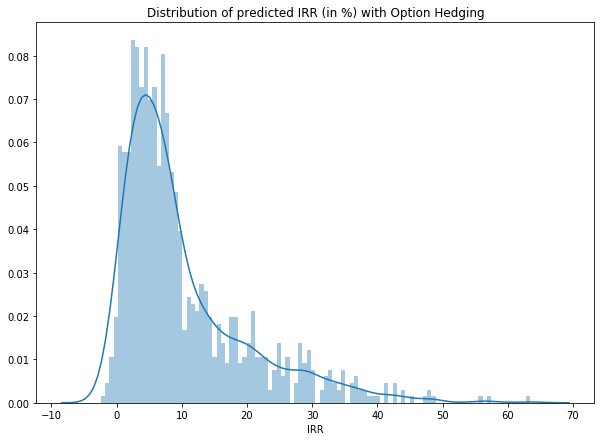

In [23]:
plt.figure(figsize = (10,7))
sns.distplot(predicted_irr_final,bins = 100)
plt.title('Distribution of predicted IRR (in %) with Option Hedging', color='black')
plt.xlabel('IRR')
plt.show()

In [24]:
print('The 5th percentile of the predicted IRRs is ' + str(round(np.percentile(predicted_irr_final,5),2)) + '%.')
print('The 50th percentile of the predicted IRRs is ' + str(round(np.percentile(predicted_irr_final,50),2)) + '%.')
print('The 95th percentile of the predicted IRRs is ' + str(round(np.percentile(predicted_irr_final,95),2)) + '%.')

The 5th percentile of the predicted IRRs is 0.71%.
The 50th percentile of the predicted IRRs is 7.01%.
The 95th percentile of the predicted IRRs is 31.56%.


Comparing with the previous percentiles of the predicted IRR I see that :
* The 5th percentile is far better than the previous one, meaning that the hedging strategy managed worked as in one of the worst situations we will save approximately 14 points in terms of IRR
* On the other hand using the hedging strategy, we won't be hoping huge returns even in the best situations as the 95th percentile is 9 points below the previous one